In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import *
import keras


In [2]:
digit_train = pd.read_csv('train.csv')
digit_test = pd.read_csv('test.csv')
digit_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
## shape of the data
digit_train.drop("label", axis=1).shape , digit_test.shape

((42000, 784), (28000, 784))

In [4]:
## Display the count of uniqque labels in the training data in numerical order 

digit_train['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [5]:
digit_train.iloc[:,1:]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
## reshape the data to a 4D image tensor

X_data = digit_train.iloc[:,1:].values.reshape(-1,28,28,1).astype('float32')
y_data = digit_train['label'].values.astype('int32')
X_data.shape, y_data.shape

((42000, 28, 28, 1), (42000,))

In [7]:
digit_test_data = digit_test.values.reshape(-1,28,28,1).astype('float32')
digit_test_data.shape

(28000, 28, 28, 1)

In [8]:
# Make y into a one-hot vector
y_data_cat = tf.keras.utils.to_categorical(y_data, num_classes=10) ## 10 classes representing digits 0-9
y_data_cat.shape

(42000, 10)

In [9]:
## Define input shape

input_shape = (28,28,1)

Text(0.5, 1.0, 'Label: 8')

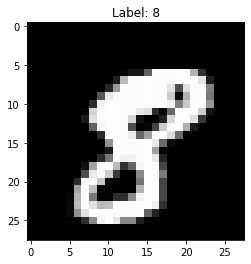

In [9]:
## visualize the images
im = 10
plt.imshow(X_data[im][:,:,0], cmap='gray')
plt.title('Label: {}'.format(y_data[im]))

Text(0.5, 0, 'Label: 0')

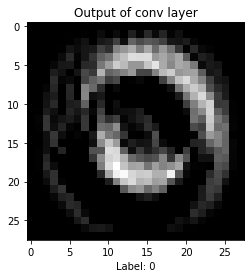

In [10]:
## Outputs from a convolutinal layer build

np.random.seed(42)
tf.random.set_seed(42)

conv = layers.Conv2D(filters=1, 
                           kernel_size=7, 
                           strides=1,
                           padding="SAME", 
                           activation="relu", 
                           input_shape=(28, 28, 1))

out = conv(X_data[0:2])
plt.imshow(out[1,:,:,0], cmap='gray')
plt.title('Output of conv layer')
plt.xlabel('Label: {}'.format(y_data[1]))

Text(0.5, 0, 'Label: 1')

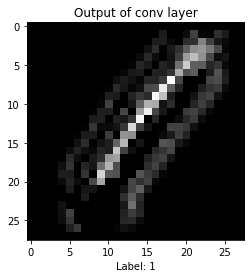

In [11]:
plt.imshow(out[0,:,:,0], cmap='gray')
plt.title('Output of conv layer')
plt.xlabel('Label: {}'.format(y_data[0]))

In [12]:
# Split the data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_cat, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

In [64]:
# Define initial model



digit_model = tf.keras.Sequential([tf.keras.layers.Input(input_shape)])
digit_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, strides=1, padding="SAME", activation="relu"))
digit_model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="SAME")) 
digit_model.add(tf.keras.layers.BatchNormalization()) ## batch normalization
digit_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=4, strides=1, padding="SAME", activation="relu"))
digit_model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="SAME"))
digit_model.add(tf.keras.layers.BatchNormalization()) ## batch normalization
digit_model.add(tf.keras.layers.Flatten())
digit_model.add(tf.keras.layers.Dense(1024, activation="relu"))
digit_model.add(tf.keras.layers.Dropout(0.2))
digit_model.add(tf.keras.layers.Dense(256, activation="relu"))
digit_model.add(tf.keras.layers.Dropout(0.2))
digit_model.add(tf.keras.layers.Dense(10, activation="softmax"))
digit_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
digit_model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 128)       131200    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                      

In [66]:
# Train the model

history = digit_model.fit(X_train, y_train, epochs=10,batch_size=64, validation_split=0.2 , verbose=1)

Epoch 1/10
420/420 [==============================] - 35s 83ms/step - loss: 0.1123 - accuracy: 0.9653 - val_loss: 0.0685 - val_accuracy: 0.9811
Epoch 2/10
420/420 [==============================] - 38s 91ms/step - loss: 0.0648 - accuracy: 0.9800 - val_loss: 0.0574 - val_accuracy: 0.9833
Epoch 3/10
420/420 [==============================] - 46s 109ms/step - loss: 0.0450 - accuracy: 0.9864 - val_loss: 0.0517 - val_accuracy: 0.9862
Epoch 4/10
420/420 [==============================] - 44s 106ms/step - loss: 0.0332 - accuracy: 0.9901 - val_loss: 0.0474 - val_accuracy: 0.9871
Epoch 5/10
420/420 [==============================] - 43s 103ms/step - loss: 0.0273 - accuracy: 0.9921 - val_loss: 0.0443 - val_accuracy: 0.9874
Epoch 6/10
420/420 [==============================] - 38s 91ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0484 - val_accuracy: 0.9872
Epoch 7/10
420/420 [==============================] - 38s 90ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0462 - val_accura

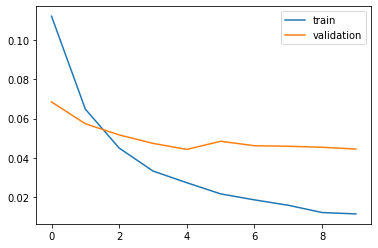

In [67]:
# plot the training and validation loss

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [68]:
## evaluate the model

scores1 =digit_model.evaluate(X_test, y_test)




263/263 [==============================] - 4s 16ms/step - loss: 0.0313 - accuracy: 0.9905


In [70]:
## train model with callbacks
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)]

history2 = digit_model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.33, callbacks=callbacks, verbose=1)

Epoch 1/30
352/352 [==============================] - 32s 90ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.0274 - val_accuracy: 0.9933
Epoch 2/30
352/352 [==============================] - 34s 97ms/step - loss: 0.0069 - accuracy: 0.9984 - val_loss: 0.0275 - val_accuracy: 0.9933
Epoch 3/30
352/352 [==============================] - 38s 108ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0306 - val_accuracy: 0.9920
Epoch 4/30
352/352 [==============================] - 37s 104ms/step - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.0289 - val_accuracy: 0.9934
Epoch 5/30
352/352 [==============================] - 36s 103ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0283 - val_accuracy: 0.9929
Epoch 6/30
352/352 [==============================] - 32s 90ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0284 - val_accuracy: 0.9934
Epoch 7/30
352/352 [==============================] - 31s 87ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0286 - val_accura

In [72]:
scores = digit_model.evaluate(X_test, y_test)


263/263 [==============================] - 3s 12ms/step - loss: 0.0305 - accuracy: 0.9908


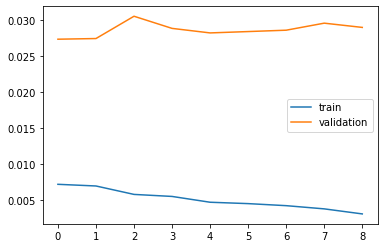

In [71]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [ ]:
## plot the confusion matrix

conf = tf.math.confusion_matrix(y_test, digit_model.predict(X_test))
sns.heatmap(conf, annot=True, cmap='Blues', cbar=False)

In [54]:
# Define model with L2 regularization and dropouts and more layers

digit_model2 = tf.keras.Sequential([tf.keras.layers.Input(input_shape)])
digit_model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=7, strides=1, padding="SAME", activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.02)))
#digit_model2.add(tf.keras.layers.BatchNormalization()) ## batch normalization
digit_model2.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="SAME")) 
digit_model2.add(tf.keras.layers.BatchNormalization()) ## batch normalization
digit_model2.add(tf.keras.layers.Conv2D(filters=128, kernel_size=4, strides=1, padding="SAME", activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.02)))
digit_model2.add(tf.keras.layers.BatchNormalization()) ## batch normalization
digit_model2.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="SAME"))
digit_model2.add(tf.keras.layers.Conv2D(filters=256, kernel_size=2, strides=1, padding="SAME", activation="relu",kernel_regularizer=tf.keras.regularizers.l2(0.02)))
#digit_model2.add(tf.keras.layers.BatchNormalization()) ## batch normalization
digit_model2.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="SAME"))
digit_model2.add(tf.keras.layers.BatchNormalization()) ## batch normalization
digit_model2.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="SAME"))
digit_model2.add(tf.keras.layers.Flatten())
digit_model2.add(tf.keras.layers.Dense(1024, activation="relu"))
digit_model2.add(tf.keras.layers.Dropout(0.2))
digit_model2.add(tf.keras.layers.Dense(256, activation="relu"))
digit_model2.add(tf.keras.layers.Dropout(0.2))
# digit_model2.add(tf.keras.layers.Dense(128, activation="relu"))
# digit_model2.add(tf.keras.layers.Dropout(0.2))
digit_model2.add(tf.keras.layers.Dense(10, activation="softmax"))
digit_model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
digit_model2.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_25 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 128)       131200    
                                                                 
 batch_normalization_26 (Bat  (None, 14, 14, 128)      512       
 chNormalization)                                                
                                                      

In [63]:
#fit new model
callback = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)]

history3 = digit_model2.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2 , verbose=1, callbacks=callback)

Epoch 1/10
126/420 [========>.....................] - ETA: 21s - loss: 0.4032 - accuracy: 0.9919

KeyboardInterrupt: 

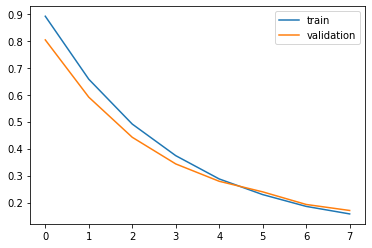

In [59]:
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [73]:
#Predictions

predictions1 = digit_model.predict(digit_test_data).argmax(axis=-1)


In [60]:
scores3= digit_model2.evaluate(X_test, y_test)

263/263 [==============================] - 4s 14ms/step - loss: 0.4297 - accuracy: 0.9880


In [61]:
predictions2 = digit_model2.predict(digit_test_data).argmax(axis=-1)

In [62]:
# write predictions to a csv file columns [ImageId,Label]

submission = pd.DataFrame({'ImageId': range(1, len(predictions1)+1), 'Label': predictions1})
submission.to_csv('submission.csv', index=False)